 <h1>REGRESSIONS  AND TIME SERIES PROJECT</h1> 

In this project we will be working with a fake absenteeism at work data set, indicating whether or not a particular employee will 'Hit target'. We will try to create a model that will predict whether or not they will miss work based off the features of that employee.

This data set contains the following features:
* Reason for absence                 
* Month of absence                   
* Day of the week                    
* Seasons                            
* Transportation expense             
* Distance from Residence to Work    
* Service time                       
* Age                                
* Work load Average/day              
* Hit target                         
* Disciplinary failure               
* Education                          
* Son                                
* Social drinker                     
* Social smoker                      
* Pet                                
* Weight                             
* Height                             
* Body mass index                    
* Absenteeism time in hours 


## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import json
import os
import sys
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import r2_score
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('../../data/01_raw/Absenteeism_at_work.csv', delimiter=';')

In [3]:
df.describe()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,...,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,18.017568,19.216216,6.324324,3.914865,2.544595,221.329730,29.631081,12.554054,36.450000,271.490235,...,0.054054,1.291892,1.018919,0.567568,0.072973,0.745946,79.035135,172.114865,26.677027,6.924324
std,11.021247,8.433406,3.436287,1.421675,1.111831,66.952223,14.836788,4.384873,6.478772,39.058116,...,0.226277,0.673238,1.098489,0.495749,0.260268,1.318258,12.883211,6.034995,4.285452,13.330998
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205.917000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244.387000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264.249000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,294.217000,...,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378.884000,...,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


In [4]:
df.shape

(740, 21)

In [5]:
df.isna().sum()

ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

# Exploratory Data Analysis

* For the rest of the exercise we'll only be using the numerical data of the csv file.
**Use seaborn to create a jointplot to compare the Number children an employee has and the Absenteeism time in hours columns. Does the correlation make sense?**


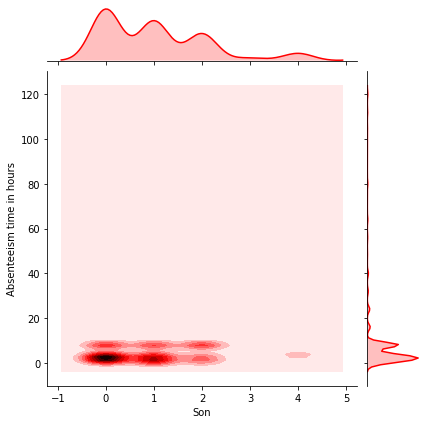

In [6]:
sns.jointplot(x='Son', y='Absenteeism time in hours', data=df, color='red', kind='kde')

In [7]:
#sns.jointplot(x='Transportation expense', y='Hit target', data=df, color='red', kind='kde')

# Creating a countplot for the group age of employees

Text(0.5, 0, 'Age')

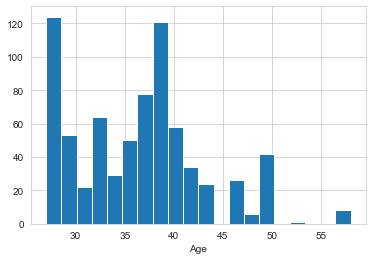

In [8]:
sns.set_style('whitegrid')
df['Age'].hist(bins=20)
plt.xlabel('Age')

In [9]:
#sns.pairplot(df,hue='Disciplinary failure',palette='bwr')

In [10]:
#plt.show()

In [11]:
#sns.jointplot(x='Service time',y='Hit target',data=df)

# Creating a count plot for the reasons of absence

(array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160.]),
 <a list of 9 Text yticklabel objects>)

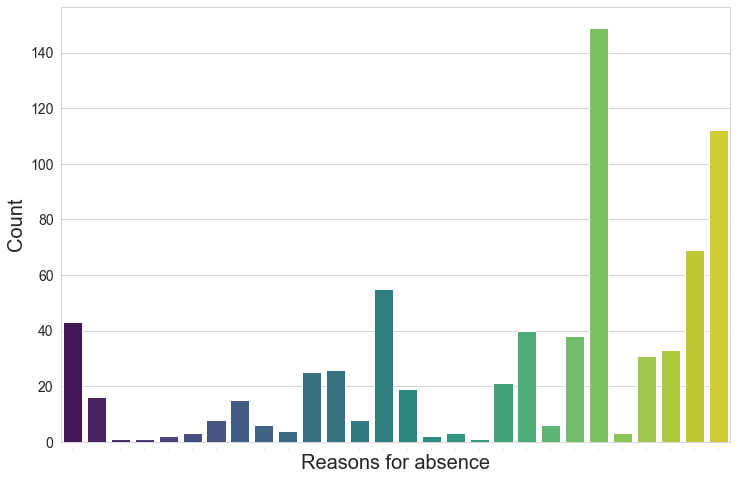

In [12]:
plt.figure(figsize=(12,8))
sns.countplot(x='Reason for absence',data=df,palette='viridis')
plt.xlabel('Reasons for absence', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.xticks(fontsize=1)
plt.yticks(fontsize=14)

## Interpretation of some reasons of absence
* medical consultation (23), blood donation (24), laboratory examination (25), unjustified absence (26), physiotherapy (27), dental consultation (28)



# Creating new features

In [13]:
# df['Month'] = pd.to_datetime(df['Month of absence'])
# df['Day of Week'] = pd.to_datetime(df['Day of Week'])

In [14]:
#df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)
# df['Month'] = df['Month of absence'].apply(lambda time: time.month)
# df['Day of Week'] = df['Day of the week'].apply(lambda time: time.dayofweek)

In [15]:
#dmap = {1:'Sun',2:'Mon',3:'Tue',4:'Wed',5:'Thu',6:'Fri'}

In [16]:
#df['Day of the week'] = df['Day of the week'].map(dmap)

In [17]:
#dmap = {1:'summer',2:'autumn',3:'winter',4:'spring'}

In [18]:
#df['Absenteeism time in hours '] = pd.to_numeric(df['Absenteeism time in hours'])

In [19]:
#df['Seasons'] = df['Seasons'].map(dmap)

In [20]:
df['medical_consult_dummy'] = (df['Reason for absence'] == 23).astype(int)
df['dental_consult_dummy'] = (df['Reason for absence'] == 28).astype(int)
df['genitourinary_dummy'] = (df['Reason for absence'] == 14).astype(int)
dow = pd.get_dummies(df['Day of the week'])
dow.columns = ['mon_dummy', 'tue_dummy', 'wed_dummy', 'thu_dummy' ,'fri_dummy']
df = pd.concat([df, dow], axis=1)
print(df.shape)

(740, 29)


In [21]:
df.columns = df.columns.str.replace(' ', '_')  # remove spaces from column titles

#### Dropping rows where Absenteeism time in hours is equal or greater than 24

In [22]:
df1 = df[df['Absenteeism_time_in_hours'] < 24]
#df1.fillna(value=0, inplace=True)
df.isna().sum()

ID                                 0
Reason_for_absence                 0
Month_of_absence                   0
Day_of_the_week                    0
Seasons                            0
Transportation_expense             0
Distance_from_Residence_to_Work    0
Service_time                       0
Age                                0
Work_load_Average/day_             0
Hit_target                         0
Disciplinary_failure               0
Education                          0
Son                                0
Social_drinker                     0
Social_smoker                      0
Pet                                0
Weight                             0
Height                             0
Body_mass_index                    0
Absenteeism_time_in_hours          0
medical_consult_dummy              0
dental_consult_dummy               0
genitourinary_dummy                0
mon_dummy                          0
tue_dummy                          0
wed_dummy                          0
t

In [23]:
#df1.groupby('ID')['Absenteeism_time_in_hours']

In [25]:
print(df1.shape)

(696, 29)


In [26]:
df1.columns

Index(['ID', 'Reason_for_absence', 'Month_of_absence', 'Day_of_the_week',
       'Seasons', 'Transportation_expense', 'Distance_from_Residence_to_Work',
       'Service_time', 'Age', 'Work_load_Average/day_', 'Hit_target',
       'Disciplinary_failure', 'Education', 'Son', 'Social_drinker',
       'Social_smoker', 'Pet', 'Weight', 'Height', 'Body_mass_index',
       'Absenteeism_time_in_hours', 'medical_consult_dummy',
       'dental_consult_dummy', 'genitourinary_dummy', 'mon_dummy', 'tue_dummy',
       'wed_dummy', 'thu_dummy', 'fri_dummy'],
      dtype='object')

## Train-test-split

In [82]:
# removed 3 variables: the target, "reason" and "day of week" (both of which we dummied)
# removed 3 more vars: 'tue_dummy' (for collinearity issues), 'Weight', 'Height' (also for collinearity issues)
X = df1[['Month_of_absence','Seasons', 'Transportation_expense', 'Distance_from_Residence_to_Work',
       'Service_time', 'Age', 'Work_load_Average/day_', 'Hit_target',
       'Disciplinary_failure', 'Education', 'Son', 'Social_drinker',
       'Social_smoker', 'Pet', 'Body_mass_index', 'medical_consult_dummy',
       'dental_consult_dummy', 'genitourinary_dummy', 'mon_dummy', 
       'wed_dummy', 'thu_dummy', 'fri_dummy']]

In [83]:
y = df1['Absenteeism_time_in_hours']

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

#### Split `X_train` into `X_train_dummy` (for categorical variables) and `X_train_cont` (for continuous variables)

In [85]:
X_train = X_train.reset_index(drop=True)  # reset index so .concat() words
X_train.shape

(487, 22)

In [87]:
# 'tue_dummy', 
X_train_dummy = X_train[['Month_of_absence','Seasons','Disciplinary_failure','medical_consult_dummy', 'dental_consult_dummy', 'genitourinary_dummy',
       'mon_dummy', 'wed_dummy', 'thu_dummy', 'fri_dummy','Social_drinker', 'Social_smoker', 
       'Education', 'Son', 'Pet']]
X_train_dummy.shape

(487, 15)

In [88]:
# 'Weight', 'Height',
X_train_cont = X_train[['Transportation_expense','Distance_from_Residence_to_Work', 
                        'Service_time', 'Age','Work_load_Average/day_', 'Hit_target', 'Body_mass_index']]
X_train_cont.shape

(487, 7)

#### Split `X_test` into `X_test_dummy` (for categorical variables) and `X_test_cont` (for continuous variables)

In [89]:
X_test = X_test.reset_index(drop=True)  # reset index so .concat() words
X_test.shape

(209, 22)

In [90]:
# 'tue_dummy', 
X_test_dummy = X_test[['Month_of_absence','Seasons','Disciplinary_failure','medical_consult_dummy', 'dental_consult_dummy', 'genitourinary_dummy',
       'mon_dummy', 'wed_dummy', 'thu_dummy', 'fri_dummy','Social_drinker', 'Social_smoker', 
       'Education', 'Son', 'Pet']]
X_test_dummy.shape

(209, 15)

In [91]:
# 'Weight', 'Height', 
X_test_cont = X_test[['Transportation_expense','Distance_from_Residence_to_Work', 'Service_time', 'Age',
                      'Work_load_Average/day_', 'Hit_target', 'Body_mass_index']]
X_test_cont.shape

(209, 7)

#### Scale `X_train_cont` and `X_test_cont`

In [92]:
scaler = StandardScaler()

In [93]:
# fit and transform training data
scaler.fit(X_train_cont)
X_train_cont_scaled = scaler.transform(X_train_cont)
X_train_cont_scaled = pd.DataFrame(X_train_cont_scaled, columns=X_train_cont.columns)

In [94]:
# just transform the testing data
X_test_cont_scaled = scaler.transform(X_test_cont)
X_test_cont_scaled = pd.DataFrame(X_test_cont_scaled, columns=X_test_cont.columns)

#### Combine `X_train_dummy` and `X_train_cont_scaled`

In [95]:
print(X_train_cont_scaled.shape)
print(X_train_dummy.shape)

(487, 7)
(487, 15)


In [96]:
X_train_scaled = pd.concat([X_train_dummy, X_train_cont_scaled], axis=1)
X_train_scaled.shape

(487, 22)

#### Combine `X_test_dummy` and `X_test_cont_scaled`

In [97]:
print(X_test_cont_scaled.shape)
print(X_test_dummy.shape)

(209, 7)
(209, 15)


In [98]:
X_test_scaled = pd.concat([X_test_dummy, X_test_cont_scaled], axis=1)
X_test_scaled.shape

(209, 22)

## Linear Regression

Using `X_train_scaled` and `X_test_scaled`

In [119]:
X_train_scaled.shape

(487, 22)

In [102]:
linreg = LinearRegression()
model1 = linreg.fit(X_train_scaled, y_train)
y_pred = linreg.predict(X_test_scaled)

In [103]:
np.sqrt(mean_squared_error(y_test, y_pred))

2.9223432512429963

In [104]:
r2_score(y_test, y_pred)

0.24857047236150986

## Linear Regression w/ RFE

Recursive feature elimination

Using `X_train_scaled` and `y_train` to choose the top 15 most important features

In [125]:
linreg = LinearRegression()
selector = RFE(linreg, n_features_to_select = 15)
selector = selector.fit(X_train_scaled, y_train)

In [126]:
top_15_cols = X.columns[selector.support_]
X_train_scaled_t15 = X_train_scaled[top_15_cols]
X_test_scaled_t15 = X_test_scaled[top_15_cols]
X_test_scaled_t15.columns

Index(['Transportation_expense', 'Distance_from_Residence_to_Work',
       'Service_time', 'Age', 'Education', 'Son', 'Social_drinker', 'Pet',
       'Body_mass_index', 'medical_consult_dummy', 'dental_consult_dummy',
       'genitourinary_dummy', 'mon_dummy', 'thu_dummy', 'fri_dummy'],
      dtype='object')

In [127]:
linreg = LinearRegression()
model1 = linreg.fit(X_train_scaled_t15, y_train)
y_pred = linreg.predict(X_test_scaled_t15)

In [128]:
np.sqrt(mean_squared_error(y_test, y_pred))

3.227637465701872

In [129]:
r2_score(y_test, y_pred)

0.08336739479390298

## Lasso Regularization

In [130]:
from sklearn.linear_model import LassoCV, Ridge

lasso = LassoCV(eps=0.001)
lasso.fit(X_train_scaled, y_train)
print('Training r^2:', lasso.score(X_train_scaled, y_train))
print('Testing r^2:', lasso.score(X_test_scaled, y_test))
print('Training RMSE:', np.sqrt(mean_squared_error(y_train, lasso.predict(X_train_scaled))))
print('Testing RMSE:', np.sqrt(mean_squared_error(y_test, lasso.predict(X_test_scaled))))

Training r^2: 0.37196469460914516
Testing r^2: 0.2536657949145882
Training RMSE: 2.7500195599991333
Testing RMSE: 2.9124184286062373


c:\users\joey\learn-env2\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
